# LABORATORIO 1


## 1. Carga de los Datos

1.1 Carga de librerias

In [2]:
import numpy as np
import pandas as pd

#from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

1.2 Carga Datos

In [3]:
#Carga de datos
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

df = pd.read_csv('./training_data.csv')


1.3 Información Basica de los Datos

In [4]:
df_dim = df.shape
print(">> El dataset estructurado contiene " + str(df_dim[1]) + " columnas y "+ str(df_dim[0]) +" filas.\n")
print(">> La estructura de los datos es la siguiente: ")

#Muestra de primeros datos
df.head() 


>> El dataset estructurado contiene 18 columnas y 4000 filas.

>> La estructura de los datos es la siguiente: 


,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465


## 2. Entendimiento de los Datos

Se genera una réplica del Dataset que contiene los datos, esto con la finalidad de prevenir la sobrescritura de la información y modificaciones no deseadas en el conjunto original, garantizando así su integridad. 

In [5]:
data = df.copy()

Los tipos de datos en cada una de las columnas son los siguientes:

In [6]:
data.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

Como se puede observar, solo una columna representa una variable en formato de texto, mientras que las demás corresponden a variables numéricas.

**Perfilamiento de datos**

Se emplea el método describe() de Pandas para obtener una descripción de las columnas del dataset. A continuación, se analizan medidas de tendencia central, dispersión y otras características relevantes.

In [7]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,0.086479,54468.000000,0.001698,0.001672
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.00000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


## 2.1 Exploración de Datos

Para realizar la exploración de datos, se optó por el uso de la librería Pandas Profiling. Primero, se instala y se importa el reporte.

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generar el informe de exploración
profile = ProfileReport(data, explorative=True)
report_file = "data_report.html"
profile.to_file(report_file)

import webbrowser
webbrowser.open(report_file)

print(f"El informe ha sido guardado en {report_file}.")


C:\Users\Mariana\.pyenv\pyenv-win\versions\3.9.12\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Summarize dataset:  81%|█████████████████████████████▉       | 227/281 [01:10<00:19,  2.80it/s, scatter rowv, redshift]

## 2.2 Verificación calidad de datos

A partir de los datos obtenidos podemos observar que se encontraron duplicados, correlaciones altas y desbalance de clases, a continuacion vamos a explicar y detallar cada uno de estos reporte para poder abordar los datos de la mejor manera.

Se detectaron 17 filas duplicadas, lo que representa el 0.4% del dataset. Para esto, se procedera a revisar estos registros y considerar su eliminación o consolidación, dependiendo de la naturaleza de los datos.

Se identificaron múltiples variables con alta correlación entre sí, lo que puede indicar redundancia en los datos y posibles problemas de colinealidad en modelos futuros. Se analizarán estas correlaciones y se evaluará su conservacion dependiendo de la importancia que tenga para realizar el calculo del redshift.

## 3. Limpieza de Datos 
Este proceso de limpieza se relizará en 4 pasos Completitud, Duplicidad, Consistencia y Estadarización.

**3.1 Completitud** 

Es importante identificar si existen filas con valores vacíos y determinar si las variables presentan un porcentaje significativo de datos faltantes.

In [ ]:
#Completitud 
data.isnull().sum()    

Se toma la decisión de no eliminar ninguna variable bajo este criterio, ya que ninguna presenta un nivel de significancía importante.

**3.2 Duplicidad**

Se buscarán registros duplicados y se eliminan.

In [ ]:
#Filas duplicadas
data.duplicated().sum()

Observamos que existen 17 registros duplicados

In [ ]:
data = data.drop_duplicates()
data=data.dropna()
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Como se observa, al momento de generar los elemenos duplicado esos se reducen a 0.

**3.3 Consistencia**

Para este caso analizamos las restricciones en ciertas variables y evaluamos la mejor desición a tomar para cada caso en especifico.
Considerando las actualizaciones del experto: 

In [ ]:
#Verificación de Valores Fuera de Rango

#Redshift es una distancia, no puede ser negativa
print("Redshift negativos:", (data["redshift"] < 0).sum())
#El score debe estar entre 0 y 1
print("Score fuera de rango:", ((data["score"] < 0) | (data["score"] > 1)).sum())
#clean solo puede tener dos valores 1 y 0 (Es confiable o no)
print("Valores únicos en 'clean':", data["clean"].unique())
#Indicando la cantidad de tipos de cuerpos celestes
data["class"].value_counts()

Como observamos encontramos 648 registros con la variable redshift negativa, sin score fuera de rango y valores dispersos únicos en clean. Por otro lado se debe recordar que el atributo clean lo que busca es decir si la medición es confiable o no. Con esto en mente, se procederá a modificar los datos de manera objetiva.

In [ ]:
# Eliminación de redshift negativo 
data.drop(data[data["redshift"] < 0].index, inplace =True)
#Eliminación mediciones no confiables
data.drop(data[data["clean"] == 0].index, inplace =True)

#Corrección de valores atipicos de class
data.loc[data["class"] == "G", "class"] = "GALAXY"
data.loc[data["class"] == "S", "class"] = "STAR"
data.loc[data["class"] == "QUASAR", "class"] = "QSO"



print("Redshift negativos:", (data["redshift"] < 0).sum())
print("Score fuera de rango:", ((data["score"] < 0) | (data["score"] > 1)).sum())
print("Valores únicos en 'clean':", data["clean"].unique())

**3.4 Estandarización**

Seaborn se utiliza junto con Matplotlib para visualizar el conjunto de datos y detectar valores atípicos (outliers). Para ello, se emplea un diagrama de cajas, el cual representa la media, los cuartiles y destaca los valores atípicos de manera clara.

In [ ]:
fig = plt.figure(figsize=(50, 30))
ax = sns.boxplot(data=data, orient="v")
print(">> Se visualizan los datos en el siguiente grafico: ")
plt.show()

Como observamos, los datos se encuentran bastante consistentes a excepcion de la variable "objid" la cual tiene sentido debido al tipo de dato que maneja.

## 4. Análisis de datos

4.1 Datos Categoricos

In [ ]:
#indica cantidad de variables confiables (1) o no (0)
data["clean"].value_counts()

In [ ]:
#Indicando la cantidad de tipos de cuerpos celestes
data["class"].value_counts()

4.2 Correlación de datos y Visualización

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar datos antes de PCA
scaler = StandardScaler()
magnitudes_scaled = scaler.fit_transform(data[["u", "g", "r", "i", "z"]])

# Aplicar PCA para reducir las 5 variables a 1 componente principal
pca = PCA(n_components=1)
data["pca_mag"] = pca.fit_transform(magnitudes_scaled)

features = ["redshift", "ra","colv","rowv","dec","score","camcol","field","run",'mjd',"pca_mag"]

# SE QUITO CLASS, JUSTIFICAR

# Verifica si las columnas existen en el DataFrame
missing_features = [f for f in features if f not in data.columns]
if missing_features:
    print(f"Advertencia: Faltan las siguientes columnas en 'data': {missing_features}")

# Generar la matriz de correlación
corr_matrix = data[features].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="Blues", vmin=0, vmax=1, annot=True, fmt=".2f", linewidths=0.5)

plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Visualización de distribución de variables importantes
plt.figure(figsize=(12, 8))
for i, col in enumerate(["redshift", "score", "rowv", "colv"]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()


In [338]:
#ver variables relevantes cuando no es confiable 
data_filtrado = data[data["clean"] == 0]
a= data_filtrado[["redshift","score","ra","dec"]]
a.describe()

,redshift,score,ra,dec
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [339]:
#ver variables relevantes cuando es confiable 
data_filtrado = data[data["clean"] == 1]
a= data_filtrado[["redshift", "ra","colv","i","rowv","dec","score","camcol","field","r","z","g","run","u",'mjd']]
a.describe()

,redshift,ra,colv,i,rowv,dec,score,camcol,field,r,z,g,run,u,mjd
count,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000
mean,0.167385,183.682748,-0.000040,16.600726,0.000203,0.191911,0.854912,3.342712,411.323729,16.863261,16.434732,17.405990,741.915932,18.659604,52867.229153
std,0.426854,40.330982,0.004933,1.112108,0.006935,1.858646,0.058140,1.698794,166.108851,1.045488,1.184986,0.931180,101.015386,0.804319,1556.902264
min,0.000000,10.469743,-0.103396,12.010790,-0.264516,-1.252763,0.301912,1.000000,19.000000,12.362850,11.799530,12.974870,211.000000,14.271480,51608.000000
25%,0.000271,161.628596,-0.001605,15.873965,-0.001202,-0.648158,0.837283,2.000000,307.000000,16.209782,15.613565,16.874327,752.000000,18.264512,51821.000000
50%,0.052522,192.786291,0.000146,16.561920,0.000308,0.013618,0.860631,3.000000,419.500000,16.858325,16.393540,17.501230,756.000000,18.889870,51984.000000
75%,0.095670,211.186747,0.001645,17.266295,0.001687,0.585553,0.879875,5.000000,519.000000,17.522635,17.151240,18.013785,756.000000,19.276780,54208.000000
max,4.192597,249.723574,0.046058,20.598250,0.086376,13.812148,0.961145,6.000000,812.000000,20.118660,20.747790,20.204270,1035.000000,19.599750,58932.000000


# 5. Modelo de regresión lineal

#### 5.1 El primer paso para crear el modelo es dividir los datos en dos grupos: un conjunto de entrenamiento y un conjunto de prueba. Para lograr esto, dividimos aleatoriamente el conjunto de datos procesados en un 80% para entrenamiento y un 20% para prueba. Es importante tener en cuenta que la columna objetivo (redshift) se separó de los datos de entrenamiento y prueba, dejando solo los features anteriormente escogidos en estos conjuntos de datos

In [340]:
# Separamos el conjunto de datos etiquetado en dos partes: entrenamiento y prueba
features2 =[ "i", "r", "z", "g", "u"]
X_train, X_test, y_train, y_test = train_test_split(a[features2], a['redshift'], test_size = 0.2, random_state = 1)

# Visualizamos las dimensiones de los conjuntos de datos
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((590, 5), (590,))

Entrenamiento del primer modelo. Se hace uso de sklearn para entrenar el modelo de regresión lineal visto en el curso. Además se sacan las predicciones del modelo sobre el conjunto de entrenamiento (y_pred)

In [341]:
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_train)

### 5.2 Coeficientes

##### A partir de los coeficientes se entiende el impacto de las diferentes variables sobre el redshift 

In [342]:
pd.DataFrame({'columns': features2, 'coef': regression.coef_})

,columns,coef
0,i,0.868206
1,r,0.357807
2,z,-1.061810
3,g,0.464424
4,u,-0.561299


El análisis de los coeficientes del modelo de regresión revela que los atributos con valores absolutos más altos (INSERTAR ATRIBUTOS) son los que tienen mayor impacto en el resultado de la regresión. Específicamente, los atributos con coeficientes positivos contribuyen a aumentar el valor de la regresión, mientras que aquellos con coeficientes negativos lo disminuyen."

El intercepto del modelo es:  -0.43902299312970927


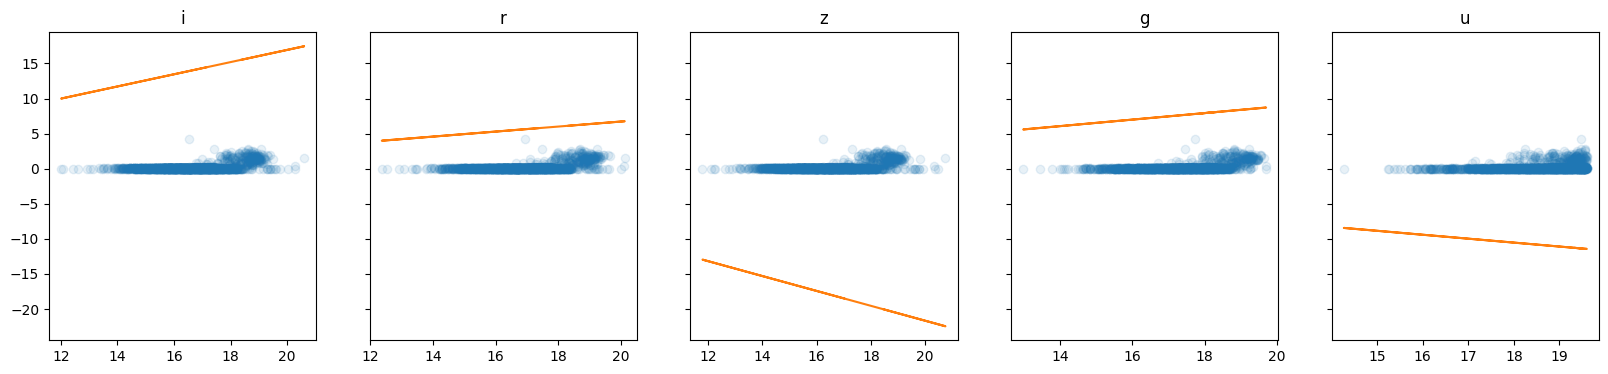

In [343]:
# Se obtiene el intercepto de la regresión

print("El intercepto del modelo es: ", regression.intercept_)
f, axs = plt.subplots(1, len(features2), sharey=True, figsize=(20, 4))

for i in range(len(features2)):
    col = features2[i]
    x = X_train[col].astype(float)
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)


### 5.3 Validación y métricas del modelo

Para validar el modelo se calcula:
- El error mínimo cuadrado RMSE porque nos da la diferencia entre el estimador y lo que estamos estimando
- El error mínimo absoluto (MAE) porque nos da el tamaño promedio de los errores en nuestro conjunto de predicciones
- El coeficiente de determinación (R^2) porque nos indica qué tan bien el modelo nos está prediciendo las variable de resultado
#

In [344]:
print('MAE for train data:', mean_absolute_error(y_train, regression.predict(X_train)))
print('MAE for test data:', mean_absolute_error(y_test, regression.predict(X_test)))

print('RMSE for train data:', np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print('RMSE for test data:', np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

print('R² for train dara: %.2f' % r2_score(y_train, y_pred))
print('R² for test data: %.2f' % r2_score(y_test, regression.predict(X_test)))

MAE for train data: 0.21463293099058986
MAE for test data: 0.2221297226381775
RMSE for train data: 0.32733450797018826
RMSE for test data: 0.36238244856785357
R² for train dara: 0.40
R² for test data: 0.32
